# <font size='10' color='#1ABC9C'>  Testing The Assumptions </font>

### Statistical Summary of the standardized , feature engineered data after the handling of the outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns
from scipy.stats import shapiro
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('dataset_cleaned.csv')
dataset.shape

(3922, 16)

In [3]:
corr = dataset.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
age,1.000000,-0.039130,0.683414,0.086327,0.076084,0.085260,-0.317232,0.290127,-0.013196,0.764340,-0.014985,0.074264,-0.044899,-0.003120,-0.005328,0.005750
yrsed,-0.039130,1.000000,-0.175180,0.217073,0.141565,0.156870,0.087625,-0.050976,0.050027,-0.021946,0.007864,0.202147,-0.196677,0.205306,0.524218,0.427419
yrsempl,0.683414,-0.175180,1.000000,0.259193,0.168022,0.183905,-0.306163,0.432647,0.021602,0.542022,0.011102,0.241402,0.025043,-0.033051,-0.088319,-0.076931
income,0.086327,0.217073,0.259193,1.000000,0.590433,0.668481,0.056843,0.194340,0.174041,0.116501,0.061136,0.955934,-0.073853,0.036654,0.129137,0.111346
creddebt,0.076084,0.141565,0.168022,0.590433,1.000000,0.684603,0.263511,0.133798,0.089234,0.078342,0.033980,0.560091,-0.028518,0.016593,0.094091,0.048600
othdebt,0.085260,0.156870,0.183905,0.668481,0.684603,1.000000,0.187926,0.137331,0.124906,0.098822,0.047592,0.636269,-0.047080,0.018635,0.103047,0.071805
default,-0.317232,0.087625,-0.306163,0.056843,0.263511,0.187926,1.000000,-0.102751,-0.016852,-0.283718,0.020316,0.051715,-0.020899,-0.007028,0.068705,0.034210
jobsat,0.290127,-0.050976,0.432647,0.194340,0.133798,0.137331,-0.102751,1.000000,0.020767,0.225077,0.017531,0.189581,0.012588,0.001336,-0.027501,-0.021996
homeown,-0.013196,0.050027,0.021602,0.174041,0.089234,0.124906,-0.016852,0.020767,1.000000,0.158903,0.020735,0.168008,-0.024261,0.028886,0.035246,0.002206
address,0.764340,-0.021946,0.542022,0.116501,0.078342,0.098822,-0.283718,0.225077,0.158903,1.000000,0.002800,0.106361,-0.032114,-0.001720,0.003415,0.001578


Finding Correlation between each Independent Variable




In [4]:
# getting a list of independent features
list_Indpndt_features = [feature for feature in dataset.columns if 'income' not in feature ]
list_Indpndt_features



['age',
 'yrsed',
 'yrsempl',
 'creddebt',
 'othdebt',
 'default',
 'jobsat',
 'homeown',
 'address',
 'cars',
 'carvalue',
 '2',
 '3',
 '4',
 '5']

In [5]:
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = dataset[list_Indpndt_features[i]].corr(dataset[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)
        


age  &  yrsempl  =  0.6834142079794245
age  &  address  =  0.7643398226858179
yrsed  &  4  =  0.524218463153435
yrsempl  &  address  =  0.5420224941079947
creddebt  &  othdebt  =  0.6846033385880277
creddebt  &  carvalue  =  0.5600908709196594
othdebt  &  carvalue  =  0.6362688824735153


## Assumption 1 :- Assumptions of Dependent and Independent Features
####        Null Hypothesis 1 : - The Independent features are Highly corelated with each other


we consider , correlation >=0.5 as high, therefore for those feature we'll fail to reject the Null hypothesis(HO)

age  &  yrsempl  =  0.6834142079794245

age  &  address  =  0.7643398226858179

yrsed  &  4  =  0.524218463153435

yrsempl  &  address  =  0.5420224941079947

creddebt  &  othdebt  =  0.6846033385880277

creddebt  &  carvalue  =  0.5600908709196594

othdebt  &  carvalue  =  0.6362688824735153


## 
####        Null Hypothesis 2 :-  The Independent features are Highly Multi-Correleted
To verify this we'll  check VIF for each feature , if VIF >10 , therefore that feature is highly multicorelated

In [6]:
## Reference : -https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =dataset[list_Indpndt_features].columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset[list_Indpndt_features].values, i)
                          for i in range(len(dataset[list_Indpndt_features].columns))]
  
print(vif_data)

     feature         VIF
0        age  325.714470
1      yrsed  372.289925
2    yrsempl   11.649265
3   creddebt    2.091147
4    othdebt    3.354282
5    default    1.581754
6     jobsat    8.406193
7    homeown    2.942276
8    address    8.004200
9       cars    3.163368
10  carvalue   32.122908
11         2    4.069429
12         3    4.204119
13         4    6.079111
14         5    3.225985


##### age ,yrsed, yrsempl, carvalue have high multi colinearity , thus for these features we fail to reject Null Hypothesis 2

Now we'll check correlation of Multicorrelated variables with Dependent Variable , and drop those have least correlation , they won't be useful for prediction.

In [7]:
target_features= [feature for feature in dataset.columns if 'yrsed' in feature or 'age' in feature or'yrsempl' in feature
                  or'carvalue' in feature ]
for i in range (0,len(target_features)):
        correlation  = dataset['income'].corr(dataset[target_features[i]])
        print( 'income' ,' & ', target_features[i] , " = " , correlation)
        

income  &  age  =  0.08632696075993336
income  &  yrsed  =  0.21707314309021528
income  &  yrsempl  =  0.2591931337754767
income  &  carvalue  =  0.9559344580170025


##### We can drop age and yrsed as it has least co-relation with income and wont be much helpful in prediction the same 

In [8]:
## droping edcat. edcat2, edcat3 and  edcat4 
dataset=dataset.drop(['age'],axis=1)
dataset=dataset.drop(['yrsed'],axis=1)

dataset.head()

,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
0,0.602060,1.230449,-0.430020,0.112096,0,4,1,22,0.0,0.959041,0,0,0,0
1,1.176091,1.079181,-0.425330,-0.406218,0,3,1,28,0.0,0.770852,0,0,0,0
2,0.845098,0.954243,-0.696869,-0.102906,0,5,0,21,0.0,0.763428,0,0,0,0
3,1.544068,1.204120,-0.502938,-0.120386,0,4,0,11,0.0,0.763428,0,0,0,0
4,0.903090,1.568202,-0.844087,-0.385303,0,3,0,11,0.0,1.344392,0,0,0,0


#### Null Hypothesis 3  : - Multivariate normality exists 
We will use :
    The Henze-Zirkler Multivariate Normality Test determines whether or not a group of variables follows a multivariate normal distribution. The null and alternative hypotheses for the test are as follows:

H0 (null): The variables follow a multivariate normal distribution.

Ha (alternative): The variables do not follow a multivariate normal distribution.

reference : -https://www.statology.org/multivariate-normality-test-python/





In [9]:
from pingouin import multivariate_normality
multivariate_normality(dataset , alpha =0.05)


HZResults(hz=2.307622780091318, pval=0.0, normal=False)

#### p-value is less than the alpha =0.05 , thus we to reject the H0

also confirmed the test by verifying Mahalonobis distance in SPSS.

#### Null Hypothesis 4 :- Independent Variables are normally Distributed

In [10]:
'''
list_feature_forBOXCOX = [feature for feature in X_train.columns if 'homeown' not in feature
                          and'edcat5' not in feature
                         and 'default' not in feature
                          and 'jobsat' not in feature]

list_feature_forBOXCOX


### Apply box-Cox Transformation.

 # to make age normalwe will apply box-cox transformation
## Reference :-https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd
from scipy import stats    

#transform the data using box-cox
for feature in list_feature_forBOXCOX:
    X_train[feature], lambd = stats.boxcox(X_train[feature])
    #plot the distribution curve and QQ-plot for transformed data
    sns.distplot(X_train[feature])
    plt.show()
    fig = sm.qqplot(X_train[feature],line='s')
    plt.show()
'''

"\nlist_feature_forBOXCOX = [feature for feature in X_train.columns if 'homeown' not in feature\n                          and'edcat5' not in feature\n                         and 'default' not in feature\n                          and 'jobsat' not in feature]\n\nlist_feature_forBOXCOX\n\n\n### Apply box-Cox Transformation.\n\n # to make age normalwe will apply box-cox transformation\n## Reference :-https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd\nfrom scipy import stats    \n\n#transform the data using box-cox\nfor feature in list_feature_forBOXCOX:\n    X_train[feature], lambd = stats.boxcox(X_train[feature])\n    #plot the distribution curve and QQ-plot for transformed data\n    sns.distplot(X_train[feature])\n    plt.show()\n    fig = sm.qqplot(X_train[feature],line='s')\n    plt.show()\n"

###### Checking the normality of all variables

In [11]:


for feature in dataset.columns:
    stat,p = shapiro(dataset[feature])
    print("\n For ",feature)
    if (p>0.05):
        print('we assume the distribution of our variable is normal/gaussian as P-value = ',p)
    else:
        print('we assume the distribution of our variable is NOT normal/gaussian as P-Value = ',p)


 For  yrsempl
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  1.427964529566403e-32

 For  income
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  4.80599284327643e-12

 For  creddebt
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  1.0716536165411572e-13

 For  othdebt
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  2.1497428837058408e-10

 For  default
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  jobsat
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  9.80908925027372e-45

 For  homeown
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  address
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  8.663815808842586e-34

 For  cars
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For

#### Null Hypothesis 5 :- There is Homoscedacity among the data 



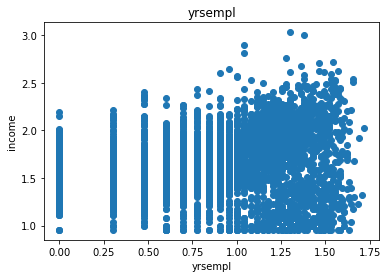

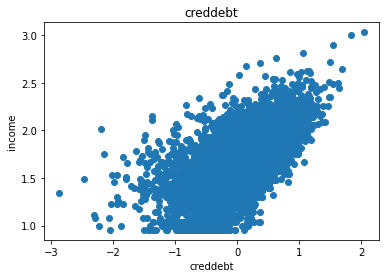

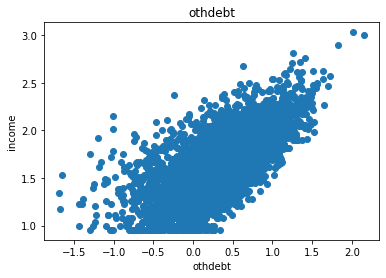

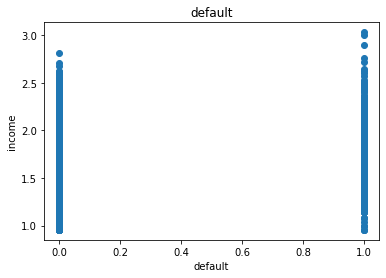

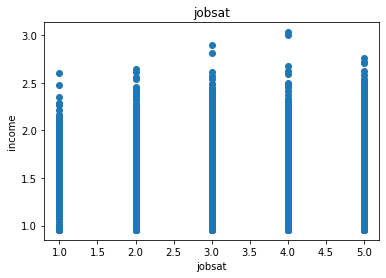

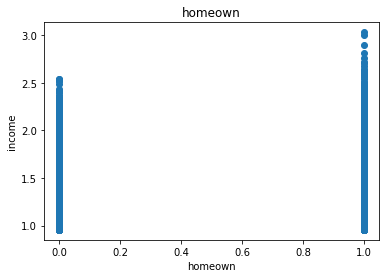

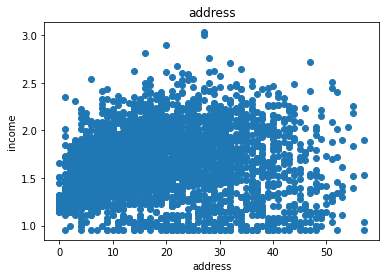

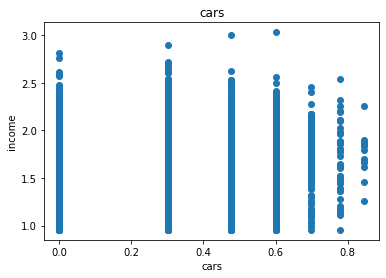

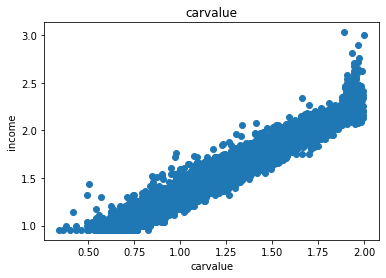

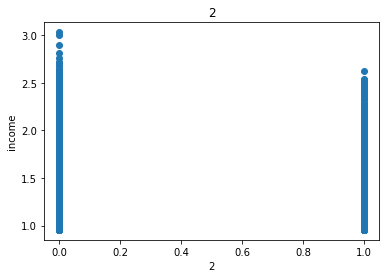

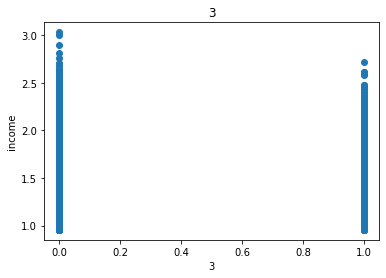

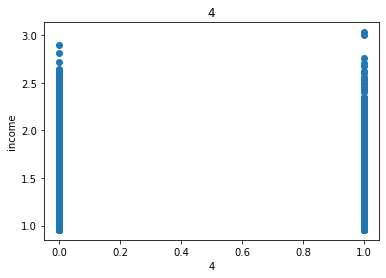

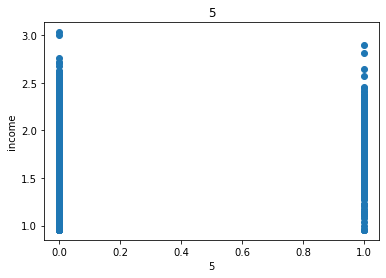

In [12]:
### we are majorly looking at continuous variables only, ignore categorical features
list_columns = [feature for feature in dataset.columns if 'income' not in feature]

for column in list_columns:
    plt.scatter(dataset[column],dataset['income'])
    plt.xlabel(column)
    plt.ylabel('income')
    plt.title(column)
    plt.show()

#### No models show signs of Hetrosedacity , hence we don't have sufficient evidence to reject the null hypothesis 5

# Now We are ready to move to Feature Selection.

In [13]:
dataset.to_csv('dataset_cleaned_assumption_OK.csv',index=False)